## Lib Text Blob feito em cima do NLTK

Vamos usar a lib text blob para entender os nossos textos. https://textblob.readthedocs.io/en/dev/index.html

In [0]:
!pip install textblob

In [0]:
from textblob import TextBlob

## Loading do discurso da Oprah
link: https://www.entrepreneur.com/article/313386

In [0]:
import requests
from urllib.request import urlopen

In [0]:
url = "https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/oprah.txt"

In [0]:
requests.get(url)

<Response [200]>

In [0]:
requests.get(url).text

'Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. And to the parents, again I say, and to the faculty, friends, graduates, good morning.\n\nI want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. And this was the year that I chose everybody individually. And I remember her walking into the office in a little township where we were doing interviews all over South Africa and she came in and recited a poem about her teacher and when she walked out the door I go, “That’s

Agora que já sabemos como pegar o texto, vamos guardá-lo numa variável

In [0]:
texto_discurso_oprah = requests.get(url).text

## Preparando discurso

Repare que temos umas \n no meio do texto. O que o \n significa? Que começa uma nova linha. A gente quer analisar \n? Não, então precisamos tirá-los. E podemos tirá-los mantendo a nova linha no texto com split.

In [0]:
discurso_oprah = texto_discurso_oprah.split('\n')
discurso_oprah[:5]

['Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. And to the parents, again I say, and to the faculty, friends, graduates, good morning.',
 '',
 'I want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. And this was the year that I chose everybody individually. And I remember her walking into the office in a little township where we were doing interviews all over South Africa and she came in and recited a poem about her teacher and when she walked out the door I go, 

Repare que repartimos nosso texto nos \n, agora vamos uni-lo preservando isso. 

In [0]:
" ".join(discurso_oprah)

'Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. And to the parents, again I say, and to the faculty, friends, graduates, good morning.  I want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. And this was the year that I chose everybody individually. And I remember her walking into the office in a little township where we were doing interviews all over South Africa and she came in and recited a poem about her teacher and when she walked out the door I go, “That’s a

## Criando funções

Show, mantemos os espaços e não temos \n. Agora que já entendemos como pegar um texto de uma página e deixá-lo pronto para análise, vamos organizar isso em funções pegar_texto e preparar_texto.

In [0]:
def pegar_texto(url):
    try:
        return requests.get(url).text
    except:
        return urlopen(url).read().decode("utf8")

In [0]:
def preparar_trecho(url):
    pagina = pega_texto(url)
    texto_inteiro = pagina.split('\n')
    return " ".join(texto_inteiro)
  
    # se precisar tirar algo, por exemplo pegar a partir da segunda linha do texto
    # return " ".join(texto_inteiro[2:])

Vamos ver se nossas funções estão funcionando.

In [0]:
texto_discurso_oprah = pegar_texto(url)
texto_discurso_oprah

'Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. And to the parents, again I say, and to the faculty, friends, graduates, good morning.\n\nI want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. And this was the year that I chose everybody individually. And I remember her walking into the office in a little township where we were doing interviews all over South Africa and she came in and recited a poem about her teacher and when she walked out the door I go, “That’s

In [0]:
discurso_oprah = preparar_trecho(url)
discurso_oprah

'Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. And to the parents, again I say, and to the faculty, friends, graduates, good morning.  I want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. And this was the year that I chose everybody individually. And I remember her walking into the office in a little township where we were doing interviews all over South Africa and she came in and recited a poem about her teacher and when she walked out the door I go, “That’s a

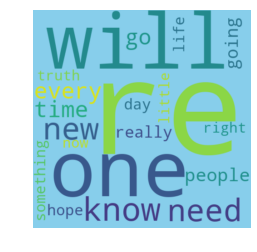

In [0]:
# plotar gráfico
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Criando lista de palavras
text=(texto_discurso_oprah)
 
# Criando o objeto wordCloud
wordcloud = WordCloud(width=480, height=480, background_color="skyblue", max_words=20).generate(text)
 
# Mostrando a imagem gerada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Explorando o TextBlob

Agora que já pegamos o texto e o preparamos, vamos entênde-lo linguisticamente. Para isso, o primeiro passo é transformá-lo em uma bolha textual (criatividade?) ou text blob.

In [0]:
oprah_blob = TextBlob(discurso_oprah)
oprah_blob

TextBlob("Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. And to the parents, again I say, and to the faculty, friends, graduates, good morning.  I want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. And this was the year that I chose everybody individually. And I remember her walking into the office in a little township where we were doing interviews all over South Africa and she came in and recited a poem about her teacher and when she walked out the door I go, 

Repare que se quisermos tratar o nosso Blob como string é fácil, só usar .blog e podemos até comparar e ver se o Blob e a string são iguais.

In [0]:
oprah_blob.string == oprah_blob

True

Esse teste significa que conseguimos aplicar métodos de string para o nosso blob também.

In [0]:
oprah_blob.find('you')

6

Agora podemos entender quais são as palavras que mais temos no discurso, para isso, vamos primeiro separar nosso texto em palavras.

In [0]:
# o -m é para indicar que é um módulo
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


Quando usarmos words, precisamos fazer o load também do pacote corpora. Vamos fazer isso e passá-lo para cima.

In [0]:
oprah_blob.words

WordList(['Thank', 'you', 'Wallis', 'Annenberg', 'and', 'a', 'special', 'thank', 'you', 'to', 'Dean', 'Willow', 'Bay', 'for', 'inviting', 'me', 'here', 'today', 'And', 'to', 'the', 'parents', 'again', 'I', 'say', 'and', 'to', 'the', 'faculty', 'friends', 'graduates', 'good', 'morning', 'I', 'want', 'to', 'give', 'a', 'special', 'shout', 'out', 'because', 'I', 'was', 'happy', 'that', 'Dean', 'Bay', 'invited', 'me', 'but', 'I', 'was', 'going', 'to', 'be', 'here', 'anyway', 'because', 'one', 'of', 'my', 'lovely', 'daughter', 'girls', 'attends', 'the', 'Annenberg', 'School', 'of', 'Journalism', 'and', 'is', 'getting', 'her', 'masters', 'today', 'so', 'I', 'was', 'coming', 'whether', 'I', 'was', 'speaking', 'or', 'not', 'So', 'a', 'special', 'shoutout', 'to', 'a', 'young', 'woman', 'who', 'I', 'met', 'when', 'she', 'was', 'in', 'the', 'seventh', 'grade', 'and', 'it', 'was', 'the', 'first', 'year', 'that', 'I', 'was', 'looking', 'for', 'smart', 'bright', 'giving', 'resilient', 'kind', 'open-

Repare que fazendo isso, estamos criando vários pedaços de texto, esses pedaços são chamados de tokens, nesse caso, acabamos de fazer uma tokenização por palavras.

In [0]:
total_palavras = 0
for palavra in oprah_blob.words:
  total_palavras += 1
print(total_palavras)

3012


Podemos também fazer uma tokenização por sentenças.

In [0]:
oprah_blob.sentences

Podemos saber quantas sentenças temos no texto.

In [0]:
total_sentencas = 0
for sentenca in oprah_blob.sentences:
  total_sentencas += 1
print(total_sentencas)

172


In [0]:
oprah_blob.noun_phrases

WordList(['thank', 'wallis annenberg', 'dean willow', 'good morning', 'special shout', 'dean', 'lovely daughter girls', 'annenberg', 'journalism', 'special shoutout', 'young woman', '” —that factor', 'africa', '’ s', '’ girl. ”', 'thando dlomo', '’ m', 'long way', 'africa', 'aunt', 'thank', 'good news', 'bad news', 'bad news', 'bad stuff upfront', 'social media—is', 'erode trust', 'wreak havoc', 'hands advertisers', 'deepest desires', 'attention spans', 'false stories', 'phony sites', 'major news outlets', 'good news', 'bad news', 'good news', 'new editorial gatekeepers', 'ambitious army', 'truth seekers', 'arm yourselves', '’ re', 'real news', 'false narratives', 'real information', 'dean', '’ ve', 'long time', '’ re', 'own humanity', '’ s', '’ re', '’ t', '’ t stand', 'starbucks', '’ t', '’ t', 'bad things', '’ re', '’ s', '’ ve', '’ re', '’ re', '’ re', 'maya angelou', '’ ve', '’ s', 'exemplify honesty', 'truth exonerates', 'usc annenberg', 'be', 'be', 'real reason', '’ re', '’ re',

In [0]:
oprah_blob.ngrams(n=3)[:15]

[WordList(['Thank', 'you', 'Wallis']),
 WordList(['you', 'Wallis', 'Annenberg']),
 WordList(['Wallis', 'Annenberg', 'and']),
 WordList(['Annenberg', 'and', 'a']),
 WordList(['and', 'a', 'special']),
 WordList(['a', 'special', 'thank']),
 WordList(['special', 'thank', 'you']),
 WordList(['thank', 'you', 'to']),
 WordList(['you', 'to', 'Dean']),
 WordList(['to', 'Dean', 'Willow']),
 WordList(['Dean', 'Willow', 'Bay']),
 WordList(['Willow', 'Bay', 'for']),
 WordList(['Bay', 'for', 'inviting']),
 WordList(['for', 'inviting', 'me']),
 WordList(['inviting', 'me', 'here'])]

In [0]:
oprah_blob.ngrams(n=4)[:15]

[WordList(['Thank', 'you', 'Wallis', 'Annenberg']),
 WordList(['you', 'Wallis', 'Annenberg', 'and']),
 WordList(['Wallis', 'Annenberg', 'and', 'a']),
 WordList(['Annenberg', 'and', 'a', 'special']),
 WordList(['and', 'a', 'special', 'thank']),
 WordList(['a', 'special', 'thank', 'you']),
 WordList(['special', 'thank', 'you', 'to']),
 WordList(['thank', 'you', 'to', 'Dean']),
 WordList(['you', 'to', 'Dean', 'Willow']),
 WordList(['to', 'Dean', 'Willow', 'Bay']),
 WordList(['Dean', 'Willow', 'Bay', 'for']),
 WordList(['Willow', 'Bay', 'for', 'inviting']),
 WordList(['Bay', 'for', 'inviting', 'me']),
 WordList(['for', 'inviting', 'me', 'here']),
 WordList(['inviting', 'me', 'here', 'today'])]

In [0]:
total_caracteres = 0
for palavra in oprah_blob.words:
  total_caracteres += len(palavra)
print(total_caracteres)

12081


O python nos fornece outro jeito de escrever isso.

In [0]:
sum(len(palavra) for palavra in oprah_blob.words)

12081

Podemos fazer outra função para contar os caracteres.

In [0]:
# função que ignora espaços e pontuação (é o que o words faz)
def conta_caracteres(texto):
    return sum(len(palavra) for palavra in TextBlob(texto).words)

In [0]:
conta_caracteres(texto_discurso_oprah)

12081

Também conseguimos saber quando algo é um verbo, advérbio, substantivo. Para isso usamos .tags. Eles retornam as classificações das palavras de acordo com a classificação da Universidade da Pennsylvania.

In [0]:
oprah_blob.tags[:10]

[('Thank', 'NNP'),
 ('you', 'PRP'),
 ('Wallis', 'VBP'),
 ('Annenberg', 'NNP'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('special', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('to', 'TO')]

Outro jeito de chamar essas tags é de POS tags, POS vem de part of speech que significa categoria gramatical.


Alguns exemplos são:
* verbo - VB
* substantivo - NN
* pronome - PR+DT
* adjetivo - JJ
* advérbio - RB
* preposição - IN
* conjunção - CC
* interjeição - UH

para entender mais das abreviações gramaticais, veja http://www.clips.ua.ac.be/pages/mbsp-tags

In [0]:
oprah_blob.parse()

'Thank/VB/B-VP/O you/PRP/B-NP/O Wallis/NNP/I-NP/O Annenberg/NNP/I-NP/O and/CC/O/O a/DT/O/O special/JJ/B-ADJP/O thank/VB/B-VP/O you/PRP/B-NP/O to/TO/B-PP/B-PNP Dean/NNP/B-NP/I-PNP Willow/NNP/I-NP/I-PNP Bay/NNP/I-NP/I-PNP for/IN/B-PP/B-PNP inviting/VBG/B-VP/I-PNP me/PRP/B-NP/I-PNP here/RB/I-NP/I-PNP today/NN/I-NP/I-PNP ././O/O\nAnd/CC/O/O to/TO/B-PP/B-PNP the/DT/B-NP/I-PNP parents/NNS/I-NP/I-PNP ,/,/O/O again/RB/B-ADVP/O I/PRP/B-NP/O say/VBP/B-VP/O ,/,/O/O and/CC/O/O to/TO/B-PP/B-PNP the/DT/B-NP/I-PNP faculty/NN/I-NP/I-PNP ,/,/O/O friends/NNS/B-NP/O ,/,/O/O graduates/NNS/B-NP/O ,/,/O/O good/JJ/B-NP/O morning/NN/I-NP/O ././O/O\nI/PRP/B-NP/O want/VBP/B-VP/O to/TO/B-PP/O give/VB/B-VP/O a/DT/O/O special/JJ/B-ADJP/O shout/VB/B-VP/O out/IN/B-PP/B-PNP because/IN/I-PP/I-PNP I/PRP/B-NP/I-PNP was/VBD/B-VP/O happy/JJ/B-ADJP/O that/IN/B-PP/B-PNP Dean/NNP/B-NP/I-PNP Bay/NNP/I-NP/I-PNP invited/VBN/B-VP/I-PNP me/PRP/B-NP/I-PNP but/CC/I-NP/I-PNP I/PRP/I-NP/I-PNP was/VBD/B-VP/O going/VBG/I-VP/O to/TO/B-P

word transformations

In [0]:
from textblob import Word
palavra = Word("octopi")
palavra.lemmatize()

'octopus'

In [0]:
palavra.lemma

'octopus'

In [0]:
verbo = Word('running')
verbo.lemmatize("v") 

'run'

In [611]:
len(oprah_blob.words)
len(oprah_blob.words[:10])

10

In [614]:
for palavra in oprah_blob.words[:20]:
    print(palavra, palavra.lemmatize())

Thank Thank
you you
Wallis Wallis
Annenberg Annenberg
and and
a a
special special
thank thank
you you
to to
Dean Dean
Willow Willow
Bay Bay
for for
inviting inviting
me me
here here
today today
And And
to to


In [615]:
for palavra in oprah_blob.words[:20]:
    print(palavra, palavra.lemmatize("v"))

Thank Thank
you you
Wallis Wallis
Annenberg Annenberg
and and
a a
special special
thank thank
you you
to to
Dean Dean
Willow Willow
Bay Bay
for for
inviting invite
me me
here here
today today
And And
to to


In [626]:
for palavra, pos_tag in oprah_blob[:2000].tags:
    if pos_tag == "VBP":
        print(palavra, palavra.lemmatize("v"))

Wallis Wallis
say say
want want
remember remember
go go
“ “
’ ’
am be
come come
want want
like like
wreak wreak
have have
are be


In [628]:
for palavra in oprah_blob[:20].words:
    print(palavra, palavra.pluralize())

Thank Thanks
you you
Wallis Walliss
Ann Anns


Contando

In [0]:
contagem_palavras = oprah_blob.word_counts
type(contagem_palavras)

collections.defaultdict

In [0]:
for word in oprah_blob.word_counts:
  if count == 5:
    print(word)

In [0]:
x = []
y = []
for palavra, contagem in contagem_palavras.items():
  x.append(str(palavra))
  y.append(contagem)
print(x, y)

['thank', 'you', 'wallis', 'annenberg', 'and', 'a', 'special', 'to', 'dean', 'willow', 'bay', 'for', 'inviting', 'me', 'here', 'today', 'the', 'parents', 'again', 'i', 'say', 'faculty', 'friends', 'graduates', 'good', 'morning', 'want', 'give', 'shout', 'out', 'because', 'was', 'happy', 'that', 'invited', 'but', 'going', 'be', 'anyway', 'one', 'of', 'my', 'lovely', 'daughter', 'girls', 'attends', 'school', 'journalism', 'is', 'getting', 'her', 'masters', 'so', 'coming', 'whether', 'speaking', 'or', 'not', 'shoutout', 'young', 'woman', 'who', 'met', 'when', 'she', 'in', 'seventh', 'grade', 'it', 'first', 'year', 'looking', 'smart', 'bright', 'giving', 'resilient', 'kind', 'open-hearted', 'had', '“', '”', '—that', 'factor', 'means', 'keep', 'no', 'matter', 'what', 'this', 'chose', 'everybody', 'individually', 'remember', 'walking', 'into', 'office', 'little', 'township', 'where', 'we', 'were', 'doing', 'interviews', 'all', 'over', 'south', 'africa', 'came', 'recited', 'poem', 'about', 't

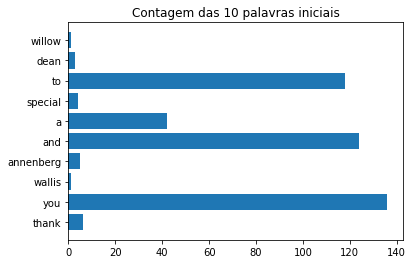

In [0]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
 
# Pegando primeiras 10 palavras e contagens
height = y[:10]
bars = x[:10]
y_pos = np.arange(len(bars))
 
# Criando barras horizontais
plt.barh(y_pos, height)
 
# Mostrando palavras no eixo y
plt.yticks(y_pos, bars)
plt.title('Contagem das 10 palavras iniciais')

plt.show()


In [0]:
def pegar_lexico(texto, utilizacoes):
    blob = TextBlob(texto)
    return {palavra.lemma for palavra, tag in blob.tags
            if tag[0].lower() in ["n", "j", "v"] and blob.words.count(palavra) >= utilizacoes}
    
pegar_lexico(texto_discurso_oprah, 10)

{'Be',
 'Do',
 'Go',
 'People',
 'be',
 'do',
 'go',
 'have',
 'know',
 'people',
 're',
 's',
 't',
 'time',
 've',
 '’'}

In [0]:
oprah_blob.tags
oprah_blob.words.count('Do') >= 5

True

In [0]:
oprah_blob.noun_phrases.count('core beliefs')

1

## Analisando o sentimento do texto

Quando dizemos algo, podemos estar sendo positivos ou negativos, certo? O que é chamado de análise de sentimento. Também conseguimos saber como estamos nisso com .sentiment.

In [0]:
oprah_blob.sentiment

Sentiment(polarity=0.12720343148914573, subjectivity=0.493960226281655)

A polaridade varia entre -1 até 1, por estar em 0.13, isso mostra que o sentimento geral está um pouco mais que neutro.

A subjetividade varia de 0 até 1, então o discurso é mais objetivo e menos subjetivo.

In [0]:
total_geral = oprah_blob.sentiment.polarity

In [0]:
total_positivo = 0
for sentenca in oprah_blob.sentences:
  if sentenca.sentiment.polarity >= 0.6:
    total_positivo += sentenca.sentiment.polarity
print('Percentual positivo:', str(round(total_positivo/total_geral, 2)) + '%')

Percentual positivo: 28.3%


In [0]:
sentenca_triste = "Life is horrible and sad."
blob_triste = TextBlob(sentenca_triste)
blob_triste.sentiment.polarity

-0.75

In [0]:
sentenca_feliz = "I am so happy."
blob_feliz = TextBlob(sentenca_feliz)
blob_feliz.sentiment.polarity

0.8

In [0]:
# Textblob inclui um analisador de sentimento pronto para uso

from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(texto_discurso_oprah, analyzer=NaiveBayesAnalyzer())

for sentence in blob.sentences[:10]:
    print(sentence, sentence.sentiment)

Thank you Wallis Annenberg and a special thank you to Dean Willow Bay for inviting me here today. Sentiment(classification='pos', p_pos=0.86503928083192, p_neg=0.13496071916807859)
And to the parents, again I say, and to the faculty, friends, graduates, good morning. Sentiment(classification='neg', p_pos=0.32014873279964656, p_neg=0.6798512672003515)
I want to give a special shout out because I was happy that Dean Bay invited me but I was going to be here anyway because one of my lovely daughter girls attends the Annenberg School of Journalism and is getting her masters today, so I was coming whether I was speaking or not. Sentiment(classification='pos', p_pos=0.8421154503878087, p_neg=0.1578845496121924)
So a special shoutout to a young woman who I met when she was in the seventh grade and it was the first year that I was looking for smart, bright, giving, resilient, kind, open-hearted girls who had “it”—that factor that means you keep going no matter what. Sentiment(classification='p

In [0]:
para = "Life is good. Life sucks. John hates soda. John hates nasty soda. John likes good soda. John loves soda. John loves sweet soda."
sent_blob = TextBlob(para)
for sent in sent_blob.sentences:
    print(sent, sent.sentiment.polarity)

Life is good. 0.7
Life sucks. -0.3
John hates soda. 0.0
John hates nasty soda. -1.0
John likes good soda. 0.7
John loves soda. 0.0
John loves sweet soda. 0.35


In [0]:
sent_blob_nb = TextBlob(para, analyzer=NaiveBayesAnalyzer())
for sent in sent_blob_nb.sentences:
    print(sent, sent.sentiment)

Life is good. Sentiment(classification='pos', p_pos=0.5995917017800413, p_neg=0.4004082982199584)
Life sucks. Sentiment(classification='neg', p_pos=0.12196027933237585, p_neg=0.8780397206676244)
John hates soda. Sentiment(classification='neg', p_pos=0.22370657856753343, p_neg=0.7762934214324665)
John hates nasty soda. Sentiment(classification='neg', p_pos=0.24953488372093077, p_neg=0.7504651162790696)
John likes good soda. Sentiment(classification='neg', p_pos=0.248901977799218, p_neg=0.7510980222007825)
John loves soda. Sentiment(classification='neg', p_pos=0.3654245396557949, p_neg=0.6345754603442052)
John loves sweet soda. Sentiment(classification='neg', p_pos=0.48973374677919485, p_neg=0.5102662532208047)


These examples used the built-in analyzers, but a Textblob analyzer can be built with a classifier object with its own methods. Some of them are very useful for model selection if you were building your own. The Textblob docs do give an example of how to build a basic sentiment classifier if you're interested.

Ao invés de saber o sentimento de sentenças individuais, vamos tentar calcular o sentimento médio de um texto. Faremos isso pelo cálculo da média de suas sentenças.

A função media_sentimento que recebe um texto, retorna a media do sentimento positivo como a some da probabilidade das sentenças positivas divididas pelo número de sentenças,

In [0]:
def media_sentimento(texto):
    sentencas = TextBlob(texto, analyzer=NaiveBayesAnalyzer()).sentences
    total_sentencas = len(sentencas)
    soma_sentimento = sum(frase.sentiment.p_pos for frase in sentencas)
    return soma_sentimento / total_sentencas

para = "Life is good. Life sucks. John hates soda. John hates nasty soda. John likes good soda. John loves soda. John loves sweet soda."
media_sentimento(para)

0.3284076725192984

Também podemos saber o sentimento de um texto inteiro com o TextBlob, mas repare que isso e a média calculada da sentença não são iguais.

In [0]:
sent_blob_nb.sentiment

Sentiment(classification='neg', p_pos=0.10828764508427687, p_neg=0.8917123549157216)

In [0]:
media_sentimento(para)

0.3284076725192984

Índices de leginilidade
são maneiras de saber o quão fácil ou complexo é ler um texto em particular baseado nas palavras e sentenças que tem. Geralmente eles mostram resultados que corelacionam bem com níveis de ensino.

Alguns índices mais fáceis de calcular são o de Auto Legibilidade em inglês Auto Readability Index (ARI) e o Coleman-Liau, em inglês Coleman-Liau Index:

$$
ARI = 4.71\frac{caracteres}{palavras}+0.5\frac{palavras}{sentenças}-21.43
$$

$$
$$$$ CL = 0.0588\frac{letras}{100 palavras} - 0.296\frac{sentenças}{100palavras} - 15.8 
$$

In [0]:
def coleman_liau_index(blob):
    chars = count_chars(blob.words)
    words = len(blob.words)
    sentences = len(blob.sentences)
    return (0.0588 * percentual_letras(chars, words)) - (0.296 * percentual_sentencas(sentences, words)) - 15.8

def percentual_letras(chars, words):
    return (chars / words) * 100
    
def percentual_sentencas(sentences, words):
    return (sentences / words) * 100

def contagem_caracteres(words):
    return sum(len(w) for w in words)

In [0]:
coleman_liau_index(sent_blob)

0.2452173913043474

Activity

Write a function `auto_readability_index(blob)` that receives a Textblob `blob` and returns the Auto Readability Index (ARI) score as defined above. For example, `auto_readability_index(sent_blob)` should return ~`0.2815`.
* **Hint**: Rememer to use the `count_chars()` function we defined before.*

In [0]:
def indice_legibilidade(blob):
    chars = contagem_caracteres(blob.words)
    words = len(blob.words)
    sentences = len(blob.sentences)
    return (4.71 * (chars / words)) + (0.5 * (words / sentences)) - 21.43

indice_legibilidade(sent_blob)

0.28155279503105746

# Corpus

In [0]:
oprah_url = 'https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/oprah.txt'
kurt_url = 'https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/kurt.txt'

texto_oprah = pegar_texto(oprah_url)
texto_kurt = pegar_texto(kurt_url)

In [0]:
dicionario_textos = {
    'oprah': TextBlob(texto_oprah, analyzer=NaiveBayesAnalyzer()),
    'kurt': TextBlob(texto_kurt, analyzer=NaiveBayesAnalyzer())
}

Vamos ver alguns dados básicos sobre os textos.

In [0]:
def contagem_caracteres(palavras):
    return sum(len(palavra) for palavra in palavras)

In [0]:
print('Nome', 'Caract.', 'Palavr.', 'Únicos', 'Sentenças', sep='\t')
for pessoa, texto in dicionario_textos.items():
  print(pessoa, contagem_caracteres(texto.words),len(texto.words),len(set(texto.words)), len(texto.sentences), sep='\t')

Nome	Caract.	Palavr.	Únicos	Sentenças
oprah	12081	3012	902	172
kurt	2400	595	291	34


Para cada texto, podemos calcular a média do número de palavras por texto.

In [0]:
# média de tamanho das sentenças: soma de todas as sentenças de palavras dividida pelo numero total de sentenças
def tamanho_medio_sentencas(blob):
    return sum(len(s.words) for s in blob.sentences) / len(blob.sentences)

tamanho_medio_sentencas(sent_blob)

3.2857142857142856

In [0]:
for pessoa, texto in dicionario_textos.items():
  texto = texto.replace('´', '')
  print(pessoa, tamanho_medio_sentencas(texto))

oprah 17.511627906976745
kurt 17.5


Podemos pegar as palavras mais usadas, vamos filtrar stopwords antes.

In [0]:
url_stopwords = "https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/en_stopwords.txt"
en_stopwords = pegar_texto(url_stopwords)
en_stopwords

'i\nme\nmy\nmyself\nwe\nour\nours\nourselves\nyou\nyour\nyours\nyourself\nyourselves\nhe\nhim\nhis\nhimself\nshe\nher\nhers\nherself\nit\nits\nitself\nthey\nthem\ntheir\ntheirs\nthemselves\nwhat\nwhich\nwho\nwhom\nthis\nthat\nthese\nthose\nam\nis\nare\nwas\nwere\nbe\nbeen\nbeing\nhave\nhas\nhad\nhaving\ndo\ndoes\ndid\ndoing\na\nan\nthe\nand\nbut\nif\nor\nbecause\nas\nuntil\nwhile\nof\nat\nby\nfor\nwith\nabout\nagainst\nbetween\ninto\nthrough\nduring\nbefore\nafter\nabove\nbelow\nto\nfrom\nup\ndown\nin\nout\non\noff\nover\nunder\nagain\nfurther\nthen\nonce\nhere\nthere\nwhen\nwhere\nwhy\nhow\nall\nany\nboth\neach\nfew\nmore\nmost\nother\nsome\nsuch\nno\nnor\nnot\nonly\nown\nsame\nso\nthan\ntoo\nvery\ns\nt\ncan\nwill\njust\ndon\nshould\nnow\n'

In [0]:
en_stopwords.split('\n')[:5]

['i', 'me', 'my', 'myself', 'we']

In [0]:
def palavras_mais_usadas(blob, n):
    word_counts = sorted(blob.word_counts.items(), key=lambda p: p[1], reverse=True)
    return list(filter(lambda p: p[0].lower() not in stopwords, word_counts))[:n]

for pessoa, texto in dicionario_textos.items():
    print(pessoa, palavras_mais_usadas(texto, 10), "\n")

oprah [('’', 89), ('re', 20), ('know', 14), ('one', 12), ('every', 12), ('go', 11), ('people', 11), ('ve', 11), ('going', 10), ('really', 10)] 

kurt [("n't", 9), ('love', 8), ('much', 7), ('people', 6), ('ve', 5), ('feel', 4), ('m', 4), ('empathy', 4), ('good', 4), ('years', 3)] 



In [0]:
def riqueza_lexica(words):
    return len(set(words)) / len(words)


This sort of exploratory work is often the first step in figuring out how to clean a text for text analysis.

Let's assess the lexical richness, defined as the ratio of number of unique words by the number of total words

In [0]:
for pessoa, texto in dicionario_textos.items():
    print(pessoa, riqueza_lexica(texto.words))

oprah 0.299468791500664
kurt 0.4890756302521008


What about sentiment?

In [0]:
for pessoa, texto in dicionario_textos.items():
    print(pessoa, media_sentimento(texto.string))

oprah 0.6231612486312436
kurt 0.6124078232572978


Readbility scores

For the Automated Readability Index, you can get the appropriate grade level here: https://en.wikipedia.org/wiki/Automated_readability_index

In [0]:
for pessoa, texto in dicionario_textos.items():
    print(pessoa, "ARI:", indice_legibilidade(texto), "CL:", coleman_liau_index(texto))

oprah ARI: 6.2174175391457425 CL: 6.09411686586985
kurt ARI: 6.318319327731093 CL: 6.226218487394956


Activity

Write a function `stats(url)` that receives a `url` from a plain text version of a book in Project Gutenberg and returns the a dictionary with statistics (Auto Readability Index, Coleman-Lieu Index, lexical richness, average sentence length in words, average sentiment, number of characters, number of words, number of unique words, number of sentences, and 10 most used words) of the text contained in the URL. For example, `stats("http://www.gutenberg.org/cache/epub/345/pg345.txt")` should return `{'ari': 7.051237118685233, 'average_sentiment': 0.6216963558545169, 'characters': 883114, 'cl': 6.151579188686984, 'lexical_richness': 15.130625285257873, 'sentence_length': 19.343680709534368, 'sentences': 8569, 'top_words': ['said', 'could', 'one', 'us', 'must', 'would', 'may', 'shall', 'see', 'know'], 'unique_words': 10955, 'words': 165756}`.
* **Hint**: Rememer to use the `get_text()` function. Be careful with what parameters to pass in to each function.*

In [0]:
def stats(url):
    text = pegar_texto(url)
    blob = TextBlob(text)
    return {
        "indice_ari": indice_legibilidade(blob),
        "indice_coleman_liau": coleman_liau_index(blob),
        "riqueza_léxica": riqueza_lexica(blob.words),
        "tamanho_medio_sentenças": tamanho_medio_sentencas(blob),
        "media_sentimento": media_sentimento(blob.string),
        "total_caracteres": contagem_caracteres(blob.string),
        "total_palavras": len(blob.words),
        "palavras_únicas": len(set(blob.words)),
        "total_sentenças": len(blob.sentences),
        "palavras_mais_usadas": [w for (w, f) in palavras_mais_usadas(blob, 10)]
    }

stats("http://www.gutenberg.org/cache/epub/345/pg345.txt")  # Dracula

{'indice_ari': 7.051237118685233,
 'indice_coleman_liau': 6.151579188686984,
 'media_sentimento': 0.6216963558545171,
 'palavras_mais_usadas': ['said',
  'could',
  'one',
  'us',
  'must',
  'would',
  'may',
  'shall',
  'see',
  'know'],
 'palavras_únicas': 10955,
 'riqueza_léxica': 0.066091121890007,
 'tamanho_medio_sentenças': 19.343680709534368,
 'total_caracteres': 883114,
 'total_palavras': 165756,
 'total_sentenças': 8569}

## Traduzindo textos

In [0]:
oprah_pt_blob = oprah_blob.translate(to='pt')
oprah_pt_blob

TextBlob("Obrigado Wallis Annenberg e um agradecimento especial a Dean Willow Bay por me convidar aqui hoje. E aos pais, novamente digo, e aos professores, amigos, graduados, bom dia. Quero dar um grito especial porque fiquei feliz que Dean Bay me convidou, mas eu estaria aqui de qualquer maneira porque uma das minhas adoráveis ​​filhas freqüenta a Escola de Jornalismo Annenberg e está recebendo seus mestres hoje, então eu estava indo se Eu estava falando ou não. Então, uma mensagem especial para uma jovem que eu conheci quando ela estava na sétima série e foi o primeiro ano em que eu estava procurando por garotas inteligentes, brilhantes, generosas, resilientes, gentis e de coração aberto que tinham “isso” - que fator que significa que você continua, não importa o quê. E este foi o ano em que escolhi todos individualmente. E eu me lembro dela entrando no escritório em um pequeno município onde estávamos fazendo entrevistas por toda a África do Sul e ela entrou e recitou um poema sobre

In [630]:
kurt_blob = TextBlob(texto_kurt)
kurt_pt_blob = kurt_blob.translate(to='pt')
kurt_pt_blob

TextBlob(""Para Boddah

Falando pela língua de um simplório experiente que obviamente preferiria ser uma queixa infantil emasculada. Essa nota deve ser bem fácil de entender.

Todos os avisos dos cursos do punk rock 101 ao longo dos anos, desde a minha primeira introdução à, digamos, ética envolvida com a independência e a adoção de sua comunidade, provaram ser muito verdadeiras. Não sinto a empolgação de ouvir e criar música junto com a leitura e a escrita há muitos anos. Sinto uma indiferença além das palavras sobre essas coisas.

Por exemplo, quando estamos nos bastidores e as luzes se apagam e o barulho maníaco das multidões começa., Isso não me afeta da maneira como afetou Freddie Mercury, que parecia amar, saborear o amor e adoração da multidão, algo que eu admiro e invejo totalmente. O fato é que não posso enganar você, qualquer um de vocês. Simplesmente não é justo para você ou para mim. O pior crime que posso pensar seria enganar as pessoas fingindo e fingindo que estou me div